In [2]:
project_name = 'emotional-speech-classification2d-resnet'

# Emotional-speech-classification using PyTorch

The dataset is taken from kaggle : https://www.kaggle.com/uwrfkaggler/ravdess-emotional-speech-audio


The dataset don't come with seperate test dataset. 

SO for the sake of comparing result I created a test and train dataset and saved into files(`train.csv`, `test.csv`).

If you use the dataset please use the csv files I created so that we can **compare the models optimally**

I also provided the code to create the test.csv and train.csv
which you can find below

## Ryerson Audio-Visual Database of Emotional Speech and Song (RAVDESS)

Speech audio-only files (16bit, 48kHz .wav) from the RAVDESS. Full dataset of speech and song, audio and video (24.8 GB) available from Zenodo. Construction and perceptual validation of the RAVDESS is described in our Open Access paper in PLoS ONE.

**Files**

- **for Speech data-set :** This portion of the RAVDESS contains 1440 files: 60 trials per actor x 24 actors = 1440. The RAVDESS contains 24 professional actors (12 female, 12 male), vocalizing two lexically-matched statements in a neutral North American accent. Speech emotions includes calm, happy, sad, angry, fearful, surprise, and disgust expressions. Each expression is produced at two levels of emotional intensity (normal, strong), with an additional neutral expression.

- **for song data-set :** This portion of the RAVDESS contains 1012 files: 44 trials per actor x 23 actors = 1012. The RAVDESS contains 24 professional actors (12 female, 12 male), vocalizing two lexically-matched statements in a neutral North American accent. Song emotions includes calm, happy, sad, angry, and fearful expressions. Each expression is produced at two levels of emotional intensity (normal, strong), with an additional neutral expression.


**File naming convention** (same for both the data-set)

Each of the 1440 files has a unique filename. The filename consists of a 7-part numerical identifier (e.g., 03-01-06-01-02-01-12.wav). These identifiers define the stimulus characteristics:

*Filename identifiers*

0. Modality (01 = full-AV, 02 = video-only, 03 = audio-only).

0. Vocal channel (01 = speech, 02 = song).

0. Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).

0. Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.

0. Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").

0. Repetition (01 = 1st repetition, 02 = 2nd repetition).

0. Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

*Filename example: 03-01-06-01-02-01-12.wav*

0. Audio-only (03)
0. Speech (01)
0. Fearful (06)
0. Normal intensity (01)
0. Statement "dogs" (02)
0. 1st Repetition (01)
0. 12th Actor (12)
0. Female, as the actor ID number is even.

**How to cite the RAVDESS**

*Academic citation*

If you use the RAVDESS in an academic publication, please use the following citation: Livingstone SR, Russo FA (2018) The Ryerson Audio-Visual Database of Emotional Speech and Song (RAVDESS): A dynamic, multimodal set of facial and vocal expressions in North American English. PLoS ONE 13(5): e0196391. https://doi.org/10.1371/journal.pone.0196391.

*All other attributions*

If you use the RAVDESS in a form other than an academic publication, such as in a blog post, school project, or non-commercial product, please use the following attribution: "The Ryerson Audio-Visual Database of Emotional Speech and Song (RAVDESS)" by Livingstone & Russo is licensed under CC BY-NA-SC 4.0.

### objective of this notebook:
use the audio to generate a spectrogram and then use a nural network for images and pass the spectograms to the model.

Previously I tried a direct approach to the `emotional classification` which didn't turned out as I expected. link to the [notebook](https://jovian.ai/kuntal-das/emotional-speech-classification)

## Setting up the notebook

In [5]:
# Uncomment the following line to run in Google Colab

# CPU:
# !pip install torch==1.7.0+cpu torchvision==0.8.1+cpu torchaudio==0.7.0 -f https://download.pytorch.org/whl/torch_stable.html

# GPU:
!pip install torch==1.7.0+cu101 torchvision==0.8.1+cu101 torchaudio==0.7.0 -f https://download.pytorch.org/whl/torch_stable.html

# For interactive demo at the end:
# !pip install pydub

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 7.6MB 8.4MB/s 


### Downloadin dataset from kaggle 

using `opendatasets` library to do the job

**NOTE :** you need to place your `kaggle.json` file into the `/content`. To download your `kaggle.json` head over to https://www.kaggle.com ==> profile ==> Account ==> create api token. The rest is handled by the `code-cell` below Q

NB: if the notebook is not running in kaggle, I'm on kaggle so I commented out this section.

In [ ]:
# !chmod 600 kaggle.json
# !pip install opendatasets --upgrade --quiet

In [ ]:
# import opendatasets as od
# import os

# def download(url):
#   #preventing multiple downloads and unziping
#   folder_name = url.split("/")[-1]
#   if os.path.isdir(folder_name):
#     print("Already Exists !")
#     return
#   od.download(url)

# dataset_url = 'https://www.kaggle.com/uwrfkaggler/ravdess-emotional-speech-audio'
# download(dataset_url)
# dataset_url = 'https://www.kaggle.com/uwrfkaggler/ravdess-emotional-song-audio'
# download(dataset_url)


In [ ]:
import os
# data_dir = './ravdess-emotional-speech-audio'
speech_dir = '../input/ravdess-emotional-speech-audio'
song_dir = '../input/ravdess-emotional-song-audio'
[dir for dir in os.listdir(speech_dir) if dir.startswith('Actor_')]

['Actor_02',
 'Actor_17',
 'Actor_05',
 'Actor_16',
 'Actor_21',
 'Actor_01',
 'Actor_11',
 'Actor_20',
 'Actor_08',
 'Actor_15',
 'Actor_06',
 'Actor_12',
 'Actor_23',
 'Actor_24',
 'Actor_22',
 'Actor_04',
 'Actor_19',
 'Actor_10',
 'Actor_09',
 'Actor_14',
 'Actor_03',
 'Actor_13',
 'Actor_18',
 'Actor_07']

In [ ]:
x = [dir for dir in os.listdir(song_dir) if dir.startswith('Actor_')]
x

['Actor_02',
 'Actor_17',
 'Actor_05',
 'Actor_16',
 'Actor_21',
 'Actor_01',
 'Actor_11',
 'Actor_20',
 'Actor_08',
 'Actor_15',
 'Actor_06',
 'Actor_12',
 'Actor_23',
 'Actor_24',
 'Actor_22',
 'Actor_04',
 'Actor_19',
 'Actor_10',
 'Actor_09',
 'Actor_14',
 'Actor_03',
 'Actor_13',
 'Actor_07']

### imports

In [6]:
import csv
import sys
import os
import random
import zipfile

from copy import deepcopy

import torch
import torchaudio
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as tt

from torch.utils.data import Dataset
from torch.utils.data.dataloader import DataLoader
# from torchvision.utils import make_grid
# from torch.utils.data import random_split

from tqdm.notebook import tqdm # Visualize the progress per epoch

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd  # To play sound in the notebook

/usr/local/lib/python3.6/dist-packages/torchaudio/backend/utils.py:54: UserWarning: "sox" backend is being deprecated. The default backend will be changed to "sox_io" backend in 0.8.0 and "sox" backend will be removed in 0.9.0. Please migrate to "sox_io" backend. Please refer to https://github.com/pytorch/audio/issues/903 for the detail.
  '"sox" backend is being deprecated. '


## Loading the data 

first the information is being loaded and saved in csv files in train test split. Then the csv files are loaded into pandas Dataframe.

I noticed the emotion `nutral`, `disgust` and `surprise` has verry low occurance compared to the other emotions in the dataset. so I decided to not use them for this project as they were affecting the accuracy heavily. This is done after I saw this video on youtube [(A07) Speech Emotion Detection](https://youtu.be/26_qiXEa8lw?t=1666) by "Amazon re:MARS"

The test train csv files will not contain thouse emotions.  

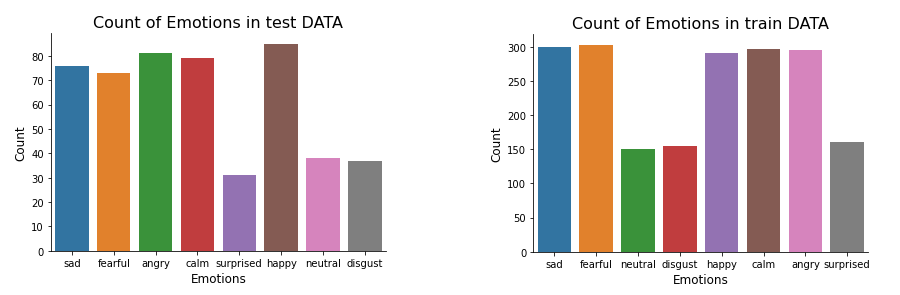

In [ ]:
classes_list = [
  ['full-AV', 'video-only','audio-only'],
  ['speech', 'song'],
  ['neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised'],
  ['normal', 'strong'], # NOTE: There is no strong intensity for the 'neutral' emotion.
  ["Kids are talking by the door", "Dogs are sitting by the door"],
  ['1st repetition', '2nd repetition'],
  ["male", "female"],
]

In [ ]:
def load_RAVDESinfo(data_dir, list_classes, X=None, Y=None):
  """
  this function will return audio file PATH and labels seperately when data directory(`data_dir`) 
  and the class list(list_classes) are passed to it
  """
  audio_dataset = list()

  if not(X or Y):
    X = list()
    Y = list()
  actors = [dir for dir in os.listdir(data_dir) if dir.startswith('Actor_')]
  for dir in actors:
    act_dir = os.path.join(data_dir,dir)
    for wav in os.listdir(act_dir):
      # getting labels form the encoded file names
      label = [(int(i)-1) for i in wav.split('.')[0].split('-')]
      # converting gender labels to only 0 and 1
      label[-1] = 1 if label[-1]%2 else 0

      l_text = []

      # converting labels back to string
      for i in range(0, len(label)):
        l_text.append(list_classes[i][label[i]])
        
      # excluding nutral, disgust and surprise Emotion
      if(l_text[2] == "neutral" or l_text[2] == "disgust" or l_text[2] == "surprised"):
        continue
      X.append(os.path.join(act_dir, wav))
      Y.append(l_text)
  
  return X,Y

In [ ]:
speech_info = load_RAVDESinfo(speech_dir,classes_list)
print(f"length of : files - {len(speech_info[0])}, labels - {len(speech_info[1])}")
song_speech_info=load_RAVDESinfo(song_dir,classes_list, *speech_info)
print(f"length of : files - {len(song_speech_info[0])}, labels - {len(song_speech_info[1])}")

length of : files - 960, labels - 960
length of : files - 1880, labels - 1880


lets see what are the contents of the song_speech_info

In [ ]:
song_speech_info[0][1440], song_speech_info[1][1440]

('../input/ravdess-emotional-song-audio/Actor_23/03-02-02-01-01-02-23.wav',
 ['audio-only',
  'song',
  'calm',
  'normal',
  'Kids are talking by the door',
  '2nd repetition',
  'male'])

In [ ]:
!pip install jovian --upgrade -q
import jovian
from sklearn.model_selection import train_test_split

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [ ]:
def test_trainSplit(dir_list,class_list,test_size=0.3):
  """
  this function given the list of directories `dir_list` and `test_size` writes out 
  `test.csv` and `train.csv` with the help of the previous function `load_RAVDESinfo`. 
  the function will not overwrite anyfile if present in the same directory.
  """
  if os.path.isfile('test.csv') or os.path.isfile('train.csv'):
    print ("csv files exist")
    return
  
  print ("csv files do not exist\n creating Test, Train Dataset(train.csv, test.csv)")
  X = None
  Y = None
  for dir in dir_list:
    X,Y = load_RAVDESinfo(dir,class_list,X,Y)

  X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=test_size, random_state=42)

  test_audios = [] 
  train_audios = [] 
  
  label_headers = ['Audio_file', 'modality', 'vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'gender']
  
  with open('train.csv', 'w+') as train:
    train_write = csv.writer(train)
    train_write.writerow(label_headers)
    for audio, label in zip(X_train, Y_train):
      row = [audio]
      row.extend(label)
      train_write.writerow(row)
        
  with open('test.csv', 'w+') as test:
    test_write = csv.writer(test)
    test_write.writerow(label_headers)
    for audio, label in zip(X_test, Y_test):
      row = [audio]
      row.extend(label)
      test_write.writerow(row)

In [ ]:
# # once csv files are created We no longer need to execute this functtion again 
# !rm *.csv
# test_trainSplit([speech_dir,song_dir],classes_list,test_size=320)

# jovian.commit(project=project_name, files=['test.csv', 'train.csv'])

I've made the csv files available in the [Kaggle](https://www.kaggle.com/kuntaldas599/ravdessemotionalspeech-songtrain-testcsv) and in [jovian](https://jovian.ai/kuntal-das/emotional-speech-classification2d-resnet/v/48/files?filename=emotional-speech-classification2d-resnet.ipynb)

Loading the audio in to pandas Dataframe

Since I created the test and train set and saved it in the csv files, which I'm going to use here

In [ ]:
# test_csv  = './test.csv'
# train_csv = './train.csv'
test_csv = '../input/ravdessemotionalspeech-songtrain-testcsv/test.csv'
train_csv = '../input/ravdessemotionalspeech-songtrain-testcsv/train.csv'

In [ ]:
test_dataframe = pd.read_csv(test_csv)
train_dataframe = pd.read_csv(train_csv)
len(test_dataframe), len(train_dataframe)

(320, 1560)

In [ ]:
test_dataframe.sample(3)

Audio_file    modality  \
47   ../input/ravdess-emotional-speech-audio/Actor_...  audio-only   
311  ../input/ravdess-emotional-song-audio/Actor_15...  audio-only   
94   ../input/ravdess-emotional-speech-audio/Actor_...  audio-only   

    vocal_channel  emotion emotional_intensity                     statement  \
47         speech    happy              normal  Kids are talking by the door   
311          song  fearful              strong  Kids are talking by the door   
94         speech    angry              normal  Kids are talking by the door   

         repetition  gender  
47   2nd repetition  female  
311  2nd repetition    male  
94   1st repetition    male

In [ ]:
train_dataframe.sample(3)

Audio_file    modality  \
1403  ../input/ravdess-emotional-song-audio/Actor_02...  audio-only   
1008  ../input/ravdess-emotional-speech-audio/Actor_...  audio-only   
710   ../input/ravdess-emotional-speech-audio/Actor_...  audio-only   

     vocal_channel  emotion emotional_intensity                     statement  \
1403          song    angry              strong  Kids are talking by the door   
1008        speech      sad              strong  Kids are talking by the door   
710         speech  fearful              strong  Kids are talking by the door   

          repetition  gender  
1403  1st repetition  female  
1008  1st repetition    male  
710   2nd repetition    male

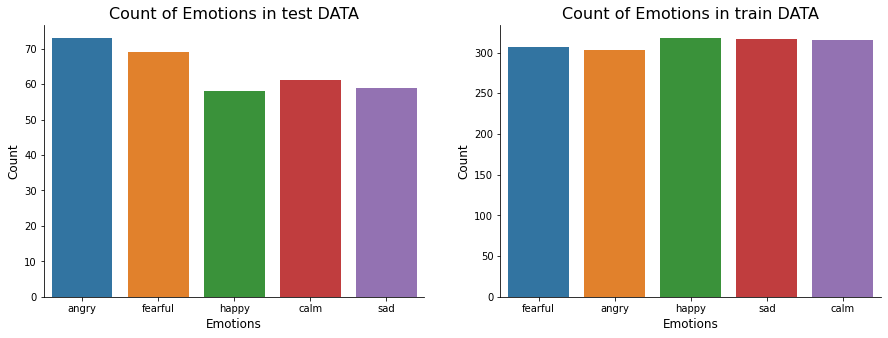

In [ ]:
fig = plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Count of Emotions in test DATA', size=16)
sns.countplot(x=test_dataframe.emotion)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
# plt.show()

plt.subplot(1,2,2)
plt.title('Count of Emotions in train DATA', size=16)
sns.countplot(x=train_dataframe.emotion)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

Lets check if all the audios have only one channel of audio

In [ ]:
def check_channel(Dataframe):
  """
  this function will take a dataframe as input and loop throught it searching for multichannel audio, 
  if found it will print the shape as a Tensor and its index in the dataframe
  """
  for i,audio_file in enumerate(Dataframe["Audio_file"]):
#     fname = os.path.join(data_dir, audio_file)
    data, rate = torchaudio.load(audio_file)
    data_shape = list(data.shape)

    if data_shape[0] != 1:
      print(f"index: {i}, shape : {data.shape}")

In [ ]:
check_channel(test_dataframe)

In [ ]:
check_channel(train_dataframe)

index: 282, shape : torch.Size([2, 166566])
index: 580, shape : torch.Size([2, 172972])
index: 1188, shape : torch.Size([2, 209809])
index: 1407, shape : torch.Size([2, 203403])


## Audio loader

Load the audio and return as a tensor. it will also turn multi-channel audio to mono.

In [ ]:
def load_mono(audio_path):
  wave, sr = librosa.load(audio_path,sr=None,mono=True)
  
  # trim silent edges
  wave, _ = librosa.effects.trim(wave)

  # convert to tensor
  wave = torch.FloatTensor(wave).unsqueeze(0)
  return wave, sr

## Data visualzation

### Spectroram

why Spectrogram You ask ?

- Because I can use any Image classification model on it.

- Because of this video -> https://youtu.be/AqqaYs7LjlM?t=255 gave me enough boost to do so

below I have plotted some graphs based on the audio.
We mainly need to focus on `4. Spectrogram` and `9. Mel Spectrogram`

basically it explains how mel spectrogram is generated with `librosa`, more explanation can be found in this awesome blog post : [getting-to-know-the-mel-spectrogram](https://towardsdatascience.com/getting-to-know-the-mel-spectrogram-31bca3e2d9d0)

Later I came to know about mfcc, so I tried to train the model on the mfcc too.

In [ ]:
def show_audio(audio_path):
  y, sr = librosa.load(audio_path, sr=None,mono=True)
  print(f"Sample rate : {sr}")
  
  # trim silent edges
  audio, _ = librosa.effects.trim(y)
  
  fig = plt.figure(figsize=(20,15))
  n_fft = 2048
  hop_length = 256
  n_mels = 128

  plt.subplot(3,3,1)
  librosa.display.waveplot(audio, sr=sr);
  plt.title('1. raw wave form data');

  plt.subplot(3,3,2)
  D = np.abs(librosa.stft(audio[:n_fft], n_fft=n_fft, hop_length=n_fft+1))
  plt.plot(D);
  plt.title(f'2. fourier transform of a window(length={n_fft})');

  plt.subplot(3,3,3)
  D = np.abs(librosa.stft(audio, n_fft=n_fft,  hop_length=hop_length))
  librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='linear');
  plt.colorbar();
  plt.title('3. applyed the Fourier Transform');

  plt.subplot(3,3,4)
  DB = librosa.amplitude_to_db(D, ref=np.max)
  librosa.display.specshow(DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log');
  plt.colorbar(format='%+2.0f dB');
  plt.title('4. Spectrogram');

  mel = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=n_mels)
  
  plt.subplot(3,3,5);
  librosa.display.specshow(mel, sr=sr, hop_length=hop_length, x_axis='linear');
  plt.ylabel('Mel filter');
  plt.colorbar();
  plt.title('5. Our filter bank for converting from Hz to mels.');

  plt.subplot(3, 3, 6);
  mel_10 = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=10)
  librosa.display.specshow(mel_10, sr=sr, hop_length=hop_length, x_axis='linear');
  plt.ylabel('Mel filter');
  plt.colorbar();
  plt.title('6. Easier to see what is happening with only 10 mels.');

  plt.subplot(3, 3, 7);
  idxs_to_plot = range(0,127,10)
  for i in idxs_to_plot:
      plt.plot(mel[i]);
  plt.legend(labels=[f'{i+1}' for i in idxs_to_plot]);
  plt.title('6. Plotting some of the triangular filters from the mels');

  plt.subplot(3,3,8)
  plt.plot(D[:, 1]);
  plt.plot(mel.dot(D[:, 1]));
  plt.legend(labels=['Hz', 'mel']);
  plt.title('8. One sampled window for example, before and after converting to mel.');

  plt.subplot(3,3,9)
  S = librosa.feature.melspectrogram(audio, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
  S_DB = librosa.power_to_db(S, ref=np.max)
  librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel');
  plt.colorbar(format='%+2.0f dB');
  plt.title('9. Mel - Spectrogram');

  fig.tight_layout() 
  plt.show()

calm
Sample rate : 48000


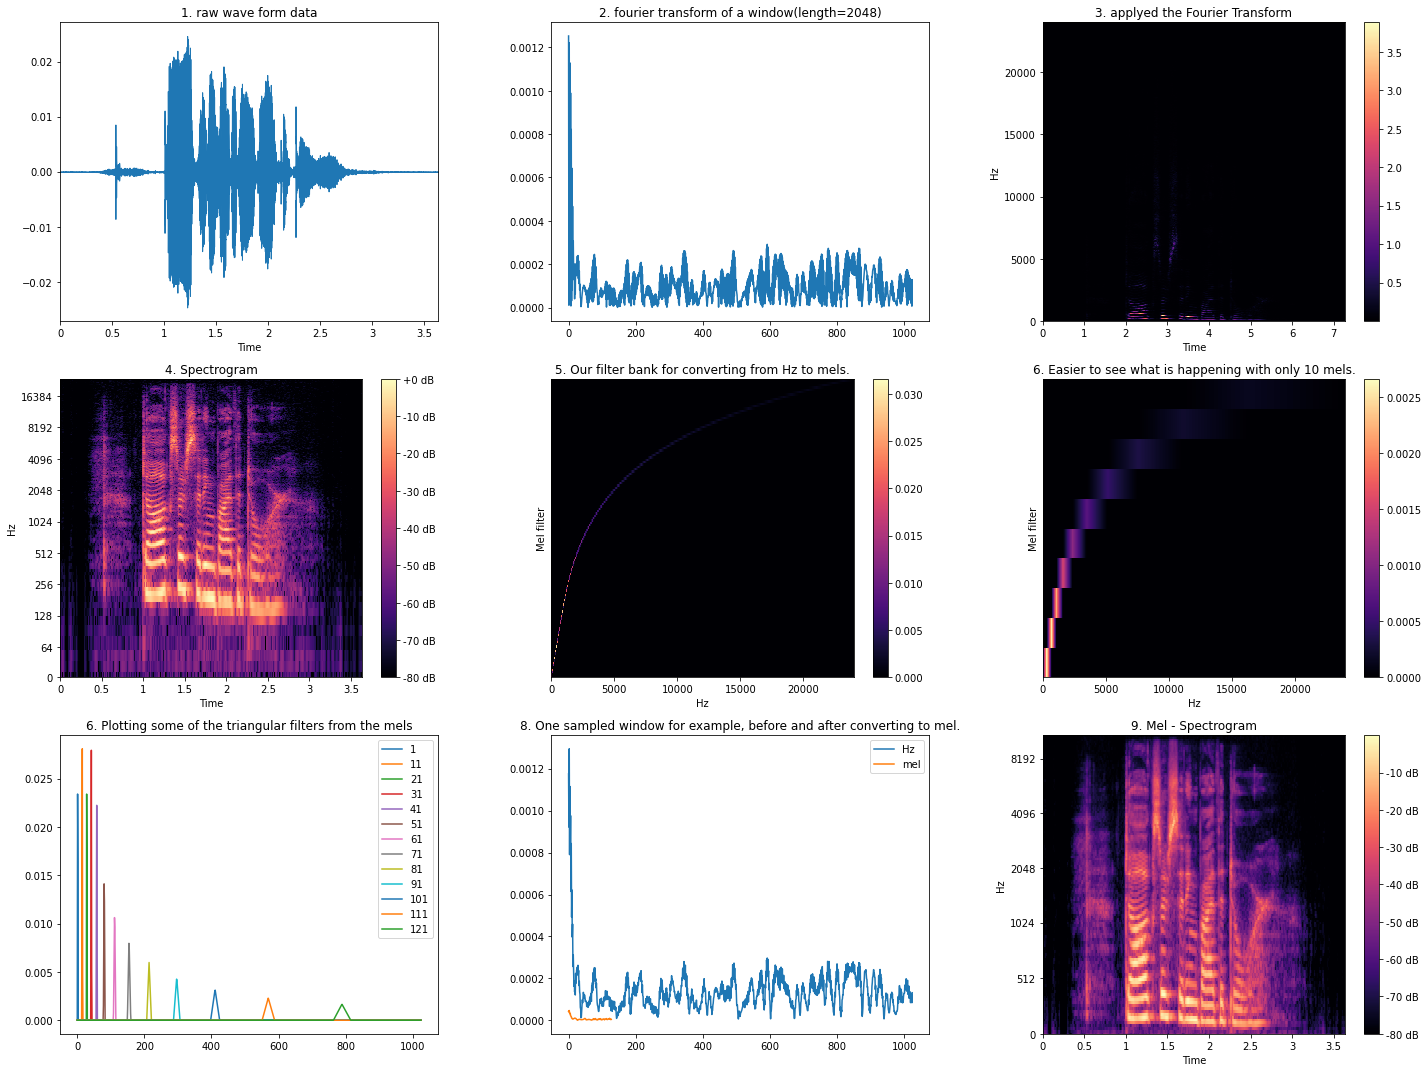

In [ ]:
path = test_dataframe.iloc[20]["Audio_file"]
print(test_dataframe.iloc[20]["emotion"])
show_audio(path)

# Lets play the audio
data, rate = load_mono(path)
ipd.Audio(data=data.numpy(),rate=rate)

sad
Sample rate : 48000


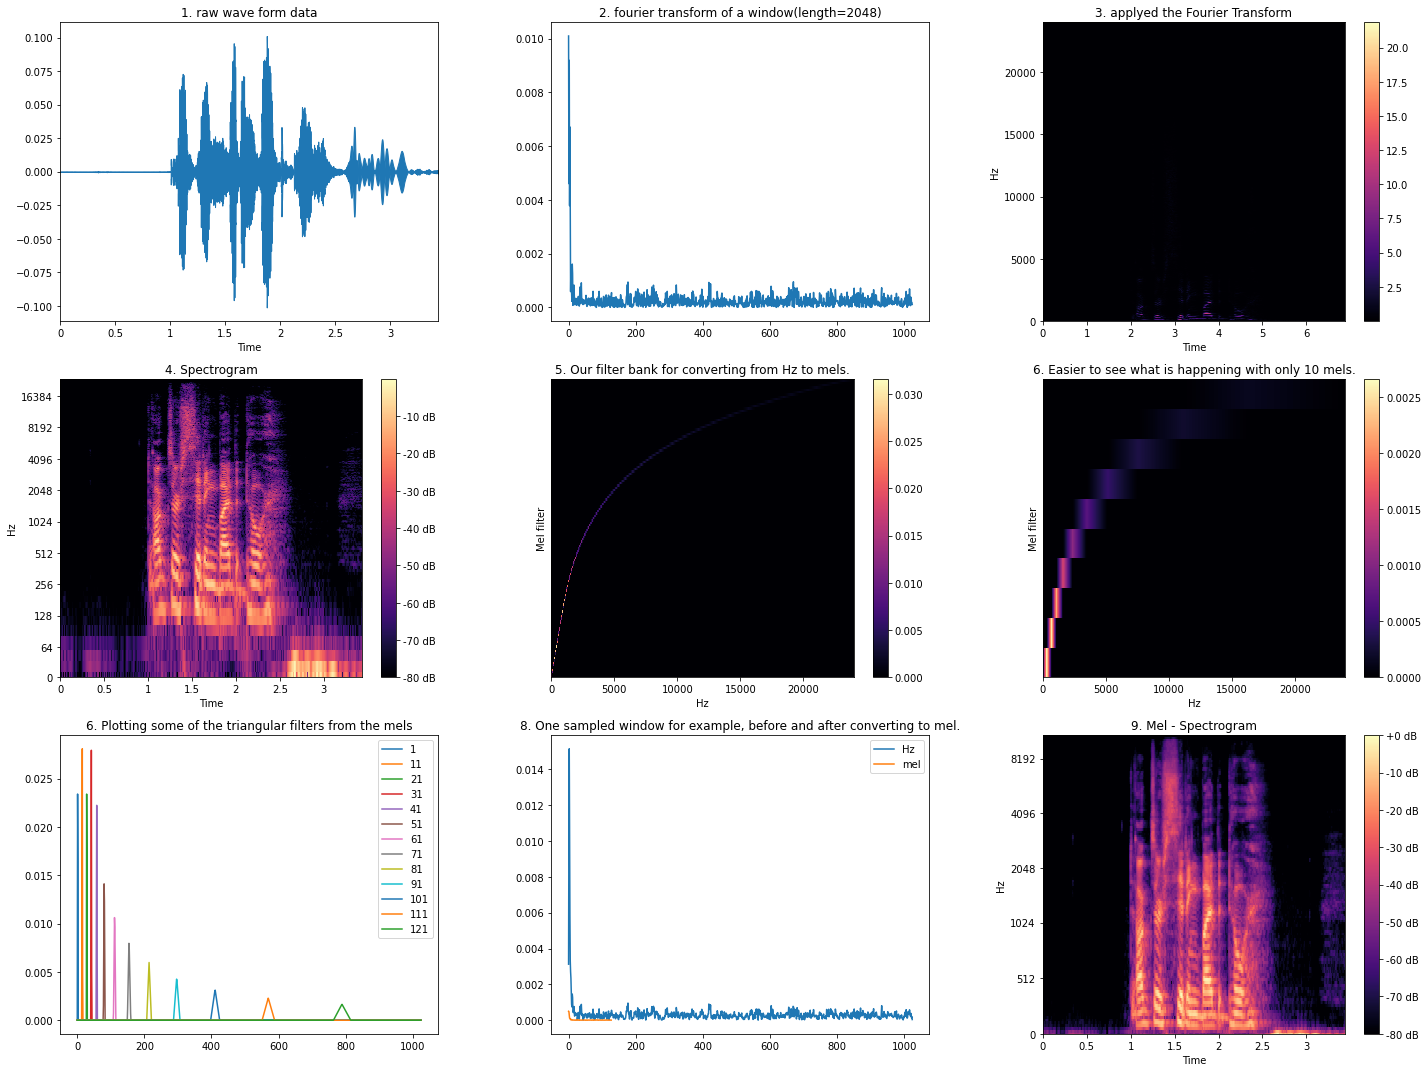

In [ ]:
i = 606
path = train_dataframe["Audio_file"].iloc[i]
print(train_dataframe.iloc[i]["emotion"])
show_audio(path)

# Lets play the audio 
data, rate = load_mono(path)
ipd.Audio(data=data.numpy(),rate=rate)

### classes

In [ ]:
emo_classes = list(set(train_dataframe["emotion"]))
len(emo_classes), emo_classes

(5, ['sad', 'happy', 'calm', 'angry', 'fearful'])

## Custom Audio Loader

Now lets modify our previous `load_mono` function to get the `Spectrogram`, `mel-sectrogram` or `mfcc`  as tensor at the same time with the `audio tensor` and `sample rate`

the function takes just the audio file path as input, then help of `librosa` it loads the audio into `numpy array` and generates the `basic spectrogram`(mode=0) `mel_spectrogram`(mode=1) or `mfcc`(mode=2) then these two are converted to tensors and returned with the `sample rate`.

This `mode` will be used throught out the notebook so please keep in mind what mode gives what to understand my work better.

In [ ]:
def load_spec(audio_path, mode=0):
  """
  takes audio path and mode to return various audio 2D representation with the 
  actual audio and sample rate as tensor

  use mode=1 to get melspectrogram
  and mode=2 to get mfcc
  Default mode=0 for Spectrogram
  """
  wave, sr = librosa.load(audio_path,sr=None,mono=True)
  # trim silent edges(below 60 db by default), change the threashold by passing `top_db`
  # The threshold (in decibels) below reference to consider as silence (default : 60 db)
  s, _ = librosa.effects.trim(wave,top_db=60)
  
  # convert to tensor
  wave = torch.FloatTensor(s).unsqueeze(0)
    
  # generate (mel)spectrogram / mfcc
  if(mode == 1):
    # s = torchaudio.transforms.MelSpectrogram(sample_rate=sr)(wave)
    s = librosa.feature.melspectrogram(y=s, sr=sr, hop_length=256)
  elif(mode == 2):
    # s = torchaudio.transforms.MFCC(sample_rate=sr)(wave)
    s = librosa.feature.mfcc(y=s, sr=sr)
  else:
    # s = torchaudio.transforms.Spectrogram()(wave)
    freqs, times, s = librosa.reassigned_spectrogram(y=s, sr=sr, hop_length=256)
    
  s = torch.FloatTensor(s).unsqueeze(0)
  return s, wave, sr


You will see that the mel-spectogram here is same as the 2nd example in the visualiation part as the `audio_path` is the same.

(psst : the spectrograms are flipped upside down)

calm
torch.Size([1, 174574])
torch.Size([1, 1025, 682])


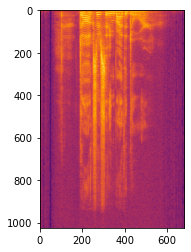

In [ ]:
audio_path = test_dataframe["Audio_file"].iloc[20]

SPECTROGRAM, audio, rate = load_spec(audio_path,mode=0)
print(test_dataframe["emotion"].iloc[20])
print(audio.shape)
print(SPECTROGRAM.shape)

plt.imshow(SPECTROGRAM.log10()[0,:,:].numpy(), cmap="inferno")
ipd.Audio(data=audio,rate=rate)

sad
torch.Size([1, 164965])
torch.Size([1, 128, 645])


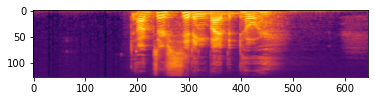

In [ ]:
audio_path = train_dataframe["Audio_file"].iloc[606]
mel_spec, audio, rate = load_spec(audio_path,mode=1)
print(train_dataframe["emotion"].iloc[606])
print(audio.shape)
print(mel_spec.shape)

plt.imshow(mel_spec.log10()[0,:,:].numpy(), cmap="inferno")
ipd.Audio(data=audio,rate=rate)

sad
torch.Size([1, 217088])
torch.Size([1, 20, 425])


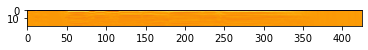

In [ ]:
audio_path = train_dataframe["Audio_file"].iloc[129]
MFCC, audio, rate = load_spec(audio_path,mode=2)
print(train_dataframe["emotion"].iloc[129])
print(audio.shape)
print(MFCC.shape)

plt.imshow(MFCC[0,:,:].numpy(), cmap="inferno")
ipd.Audio(data=audio,rate=rate)

Lets check if the `mel-spectrogram` tensors are of same `shape`

To do that we need to find max hight and width of the spectrogram for all the audios we have in the folders. 

Later it will be used to pad the `mel-spectrogram` tensors in the dataset.

The shape generated by `load_spec` will not be the same for all the audios passed to it for any `mode` so it need to be padded hence  the max_height and max_width calculation. 

In [ ]:
def get_maxDim(csv_file,max_height=0,max_width=0,mode =0, verbose=False):
  min_width = min_height = 5e5
#   stdv = []
#   med = []
#   mean = [] 
    
  dataframe = pd.read_csv(csv_file)
  for i,path in enumerate(dataframe["Audio_file"]):

    spec,_,_ = load_spec(path,mode=mode)
    
#     # calc std
#     stdv.append(torch.std(spec))
#     med.append(torch.median(spec))
#     mean.append(torch.mean(spec))
    
    _, height, width = list(spec.shape) 
    if(height > max_height):
      max_height = height
      if verbose:
        print(f"{i} max height - {height}")
    if(width > max_width):
      max_width = width
      if verbose:
        print(f"{i} max width - {width}")
    
    # just printing 
    if(min_width > width):
      min_width = width
      if verbose:
        print(f"{i} min width - {min_width}")
    if(min_height > height):
      min_height = height
      if verbose:
        print(f"{i} min height - {min_height}")

#   stdv = torch.FloatTensor(stdv)
#   med = torch.FloatTensor(med)
#   mean = torch.FloatTensor(mean)
#   print(f"\tstdv : {torch.mean(stdv)},\n\tmedian : {torch.mean(med)}, \n\tmean: {torch.mean(mean)}")
  print(f"min-width : {min_width},\tmin-height : {min_height}")
  print(f"max-width : {max_width},\tmax-height : {max_height}")

  return max_height,max_width

In [ ]:
# mode : 0-spectrogram, 1-mel_spectrogram, 2-mfcc

max_dim = get_maxDim(test_csv,mode=1)
# print(max_dim)
max_dim = get_maxDim(train_csv, *max_dim, mode=1)
# print(max_dim)

min-width : 259,	min-height : 128
max-width : 1087,	max-height : 128
min-width : 245,	min-height : 128
max-width : 1087,	max-height : 128


In [ ]:
max_dim

(128, 1087)

## Data transforms (normalization & data augmentation)

applying diffirent ***image*** transforms on the mel-spectrogram to randomly represent the same data to the model.

I could not achive full normalization on the data, so removed it.

**UPDATE : I tried to use image augmentation on the spectrogram of the images though it reduced overfitting in some cases but it turned out to be a failure as it prevented to gain more accuracy than 40%.**
So in the final version any data augmentation is not used.

In [ ]:
# Data transforms (normalization & data augmentation)
# stats = ((range of means for each channel), (range of std deviation for each channel))
# stats = ((-1.5), (2.51))
train_aug = tt.Compose([
                         tt.RandomCrop((max_dim[0],(max_dim[0]*125)//100), padding=12 ,pad_if_needed=True ,padding_mode='reflect'), 
                         tt.RandomHorizontalFlip(0.4),
                         tt.RandomVerticalFlip(0.4),
                         tt.RandomRotation(22.5),
#                          tt.Normalize(*stats,inplace=True),
                        ])
# valid_tfms = tt.Compose([tt.Normalize(*stats)])

In [ ]:
# def denormalize(images, means, stds):
#     means = torch.tensor(means)
#     stds = torch.tensor(stds)
#     return images * stds + means
#     return images
# del denormalize

torch.Size([1, 164965])
mel-spec shape before:torch.Size([1, 128, 645])
mel-spec shape after :torch.Size([1, 128, 160])


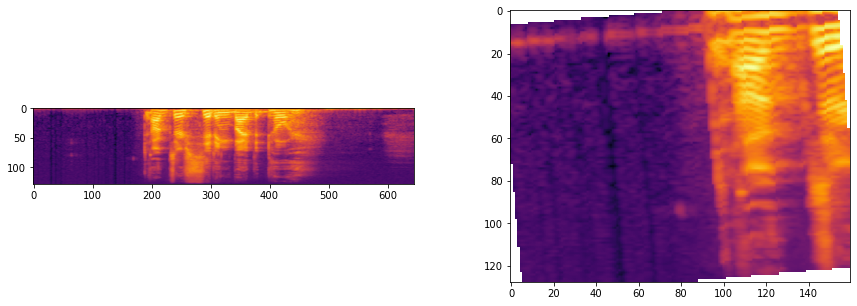

In [ ]:
audio_path = train_dataframe["Audio_file"].iloc[606]
mel_spec, audio, rate = load_spec(audio_path,mode=1)
print(audio.shape)
print(f"mel-spec shape before:{mel_spec.shape}")

# print(f"\n before : \n\tmax :{torch.max(mel_spec)},\n\tmin:{torch.min(mel_spec)},\n\tmean:{torch.mean(mel_spec)},\n\tstd:{torch.std(mel_spec)}\n")
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.imshow(mel_spec.log10()[0,:,:].numpy(),cmap="inferno")

mel_spec = train_aug(mel_spec)
print(f"mel-spec shape after :{mel_spec.shape}")
# print(f"\n after : \n\tmax :{torch.max(mel_spec)},\n\tmin:{torch.min(mel_spec)},\n\tmean:{torch.mean(mel_spec)},\n\tstd:{torch.std(mel_spec)}\n")
# mel_spec = denormalize(mel_spec, *stats)

plt.subplot(1,2,2)
plt.imshow(mel_spec.log10()[0,:,:].numpy(),cmap="inferno")


Hidden<!-- The colors seem out of place because of the normalization. Note that normalization is also applied during inference. If we look closely, we can see the cropping, reflection padding and rotation in some of the images. Horizontal flip and vertical flip are a bit difficult to detect from visual inspection. -->

## DataSets

the `init` functions takes `csv_file` as path of the csv file, `data_dir` is the folder path the data is located, `dim` is the max dimention present in the data(spectrogram), `loader` is the function which can be used to do data augmentation and normalization, `mode` is the mode option to be used in the `load_spec` function.(mode=1 : mel-spectrogram in log10 scale, mode=2 : mfcc ,default : mode = 0) 

Another thing is loader is by default is none, in this case the spectograms will be all-side padded with Zeros to the max dim to make all the spectrogram tensor of same dimention.
(I saw padding in both sides somehow reduced the overfitting issue I was geting before with only padding the right side when I was using mel-spectrogram) 

If `loader` is passed the default padding wont take place instead the `loader` will take place of the default padding function, this loader functon need work with spectrograms(2d tensors).

In [ ]:
class ravdessEmoDataSet(Dataset):
  def __init__(self, csv_file, dim, loader=None, mode=0):
    self.dataframe = pd.read_csv(csv_file)
    self.classes = list(set(self.dataframe["emotion"]))
    # self.classes = list(set(self.dataframe["gender"]))
    self.loader = loader
    self.dim = dim
    self.mode = mode

  def __len__(self):
    return len(self.dataframe)

  def __getitem__(self, index):
    row = self.dataframe.loc[index]
    audio_path,_,_, emotion, emo_intensity,_,_, gender = row
    
    label = self.classes.index(emotion)
    # label = self.classes.index(gender)

    s, waveform, rate = load_spec(audio_path,mode=self.mode)

    if self.loader:
      s = self.loader(s)
    else:
      _, height, width = list(s.shape)
      diff = [self.dim[0] - height, self.dim[1] - width]
      # pad on both side of the tensor by zeros
      pd1 = (diff[1]//2, diff[1]-diff[1]//2, diff[0]//2,diff[0]-diff[0]//2)
      # pd1 = (0, diff[1], 0,diff[0]) # only pad on right side of the tensor by zeros
      s = F.pad(s, pd1, mode='constant', value=0)

    return s, label

In [ ]:
test_dataset = ravdessEmoDataSet(test_csv, dim = max_dim, mode=0)
# train_dataset = ravdessEmoDataSet(train_csv, data_dir, dim = max_dim, mode=0)
train_dataset = ravdessEmoDataSet(train_csv, dim = max_dim, mode=0, loader=train_aug)
len(test_dataset),len(train_dataset)

(320, 1560)

Again, below we can see the tensor after all cropping, reflection padding, random rotating being present in the train_dataset.

It is just a demonstration what would be passed to the model if image data augmentation is used on the spectrograms.

spectrogram shape torch.Size([1, 128, 160])
label : sad


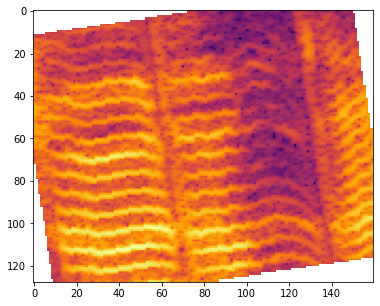

In [ ]:
x,l = train_dataset[129]
print(f"spectrogram shape {x.shape}")
print(f"label : {train_dataset.classes[l]}")
# x = denormalize(x, 0.28, 3.52)
plt.figure(figsize=(15,5))
plt.imshow(x.log10()[0,:,:].numpy(),cmap="inferno")

But the test dataset or the valudation dataset does not have all these data-auugmentation but all the mel-spectrogram is being padded with zeros to make the shape of all the images same.

spectrogram shape torch.Size([1, 128, 1087])
label : happy


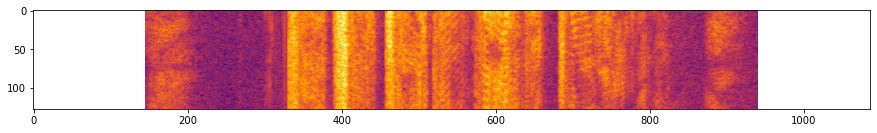

In [ ]:
x,l = test_dataset[3]
print(f"spectrogram shape {x.shape}")
print(f"label : {train_dataset.classes[l]}")
# x = denormalize(x, 0.28, 3.52)
plt.figure(figsize=(15,5))
plt.imshow(x.log10()[0,:,:].numpy(),cmap="inferno")

## DataLoader and Batch size

In [ ]:
batch_size = 40

train_dl = DataLoader(train_dataset, batch_size, shuffle=True, num_workers=4, pin_memory=True)
test_dl = DataLoader(test_dataset, batch_size*2, num_workers=4, pin_memory=True)

## Base class

In [ ]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class SpectrogramClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels)  # Calculate loss
        return loss

    def validation_step(self, batch):
        images, labels = batch
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

    def epoch_end(self, epoch, result):
        print("Epoch [{}],{} train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, "last_lr: {},".format(result['lrs'][-1]) if 'lrs' in result else '', 
            result['train_loss'], result['val_loss'], result['val_acc']))

## The Model

### Using PreTrained model Resnet18

PreTrained turned out not so much useful for audio classification, as the model was not trained or intended to train on audio data.

But it is good enough to make decent prediction accuracy in Emotion Classification with audio only.

In [ ]:
class EmotionalResnet18(SpectrogramClassificationBase):
    def __init__(self, in_channels,num_classes, pretrained=True):
        super().__init__()
        # Use a pretrained model
        self.network = torchvision.models.resnet18(pretrained)
        
        # Replace the first layer
        self.network.conv1 = nn.Conv2d( 
            in_channels,
            self.network.conv1.out_channels,
            kernel_size=7,
            stride=2,
            padding=3
        )
        
        # Replace last layer
        self.network.fc = nn.Linear(self.network.fc.in_features, 512)
        # new layer introduced
        self.fc2 = nn.Sequential(
            nn.Dropout(),
            nn.Linear(512, num_classes),
            nn.Softmax(dim=1),
        )
            

    def forward(self, xb):
        out = self.network(xb)
        return self.fc2(out)

In [ ]:
class_len= len(test_dataset.classes)
class_len

5

In [ ]:
model = EmotionalResnet18(1,class_len,pretrained=False)
model.parameters

<bound method Module.parameters of EmotionalResnet18(
  (network): ResNet(
    (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, mom

## Evaluate and fit

In [ ]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase
        model.train()
        train_losses = []
#         for batch in tqdm(train_loader):
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader,
                  weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []

    # Set up custom optimizer with weight decay
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # Set up one-cycle learning rate scheduler
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs,
                                                steps_per_epoch=len(train_loader),
                                                pct_start=0.15)

    for epoch in range(epochs):
        # Training Phase
        model.train()
        train_losses = []
        lrs = []
#         for batch in tqdm(train_loader):
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()

            # Gradient clipping
            if grad_clip:
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)

            optimizer.step()
            optimizer.zero_grad()

            # Record & update learning rate
            lrs.append(get_lr(optimizer))
            sched.step()

        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
    return history

## Using a GPU

To seamlessly use a GPU, if one is available, we define a couple of helper functions (get_default_device & to_device) and a helper class DeviceDataLoader to move our model & data to the GPU as required.

In [ ]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

Based on where you're running this notebook, your default device could be a CPU (torch.device('cpu')) or a GPU (torch.device('cuda'))

In [ ]:
device = get_default_device()
device

device(type='cuda')

We can now wrap our training and validation data loaders using DeviceDataLoader for automatically transferring batches of data to the GPU (if available).

In [ ]:
train_dl = DeviceDataLoader(train_dl, device)
test_dl = DeviceDataLoader(test_dl, device)
model = to_device(model,device)

## Training The Model

In [ ]:
## if out of memory error hapens try uncommenting this cell
# # Data to delete to release memory 
# del speech_info
# del song_speech_info
# del train_dataframe,
# del SPECTROGRAM
# del audio
# del mel_spec
# del MFCC
# del test_dataset
# del train_dataset
# del train_dl
# del test_dl
# del model

# del load_RAVDESinfo
# del test_trainSplit
# del check_channel
# del load_mono
# del show_audio

In [ ]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');
    
def plot_lrs(history):
    lrs = np.concatenate([x.get('lrs', []) for x in history])
    plt.plot(lrs)
    plt.xlabel('Batch no.')
    plt.ylabel('Learning rate')
    plt.title('Learning Rate vs. Batch no.');

I will be usin the `fit_one_cycle` method to train the model, however we can do the training with constant `lr` by using the `fit` function

In [ ]:
# %%time
# history += fit(epochs,max_lr,model,train_dl,test_dl,opt_func=opt_func)

We're now ready to train our model. Instead of SGD (stochastic gradient descent), we'll use the Adam optimizer which uses techniques like momentum and adaptive learning rates for faster training. You can learn more about optimizers here: https://ruder.io/optimizing-gradient-descent/index.html

In [7]:
epochs = 30
max_lr = 1e-5
grad_clip = 0.1
weight_decay = 1e-5
opt_func = torch.optim.Adam

### Training the model with ***Spectrogram***

In [ ]:
M = 0 # Spectrogram

max_dim = get_maxDim(test_csv,mode=M)
spectro_max_dim = get_maxDim(train_csv, *max_dim, mode=M)

test_dataset = ravdessEmoDataSet(test_csv, dim = spectro_max_dim, mode=M)
train_dataset = ravdessEmoDataSet(train_csv, dim = spectro_max_dim, mode=M)
print(f" length : \n\ttest:{len(test_dataset)},\n\ttrain:{len(train_dataset)}")

batch_size = 10

train_dl = DataLoader(train_dataset, batch_size, shuffle=True, num_workers=4, pin_memory=True)
test_dl = DataLoader(test_dataset, batch_size*2, num_workers=4, pin_memory=True)

class_len= len(test_dataset.classes)
print(f"class lenght : {class_len}")

model = EmotionalResnet18(1,class_len,pretrained=True)
# model.load_state_dict(torch.load("./EAC-spectro_model.pth"))

device = get_default_device()
print(f"device : {device}")

train_dl = DeviceDataLoader(train_dl, device)
test_dl = DeviceDataLoader(test_dl, device)
spectro_model = to_device(model,device)

history = [evaluate(spectro_model, test_dl)]
print(history)

min-width : 259,	min-height : 1025
max-width : 1087,	max-height : 1025
min-width : 245,	min-height : 1025
max-width : 1087,	max-height : 1025
 length : 
	test:320,
	train:1560
class lenght : 5


Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth



device : cuda
[{'val_loss': 1.606602668762207, 'val_acc': 0.22812499105930328}]


In [ ]:
%%time
history += fit_one_cycle(epochs, max_lr, spectro_model, train_dl, test_dl, 
                             grad_clip=grad_clip, 
                             weight_decay=weight_decay, 
                             opt_func=opt_func)

Epoch [0],last_lr: 1.512254386569928e-06, train_loss: 1.6143, val_loss: 1.6082, val_acc: 0.2281
Epoch [1],last_lr: 4.3547220045211664e-06, train_loss: 1.6048, val_loss: 1.5781, val_acc: 0.3406
Epoch [2],last_lr: 7.593787454924968e-06, train_loss: 1.5603, val_loss: 1.5158, val_acc: 0.3781
Epoch [3],last_lr: 9.709706530936783e-06, train_loss: 1.5171, val_loss: 1.4823, val_acc: 0.3812
Epoch [4],last_lr: 9.990516681618647e-06, train_loss: 1.4845, val_loss: 1.4572, val_acc: 0.3969
Epoch [5],last_lr: 9.914865838957516e-06, train_loss: 1.4563, val_loss: 1.4252, val_acc: 0.4719
Epoch [6],last_lr: 9.764710943295776e-06, train_loss: 1.4382, val_loss: 1.4143, val_acc: 0.5062
Epoch [7],last_lr: 9.542328189792182e-06, train_loss: 1.4107, val_loss: 1.4054, val_acc: 0.5125
Epoch [8],last_lr: 9.251088674305358e-06, train_loss: 1.3866, val_loss: 1.3973, val_acc: 0.5250
Epoch [9],last_lr: 8.895407291016862e-06, train_loss: 1.3620, val_loss: 1.3601, val_acc: 0.5719
Epoch [10],last_lr: 8.480675807135715e-

In [12]:
train_time0 = "1h 3min 39s"

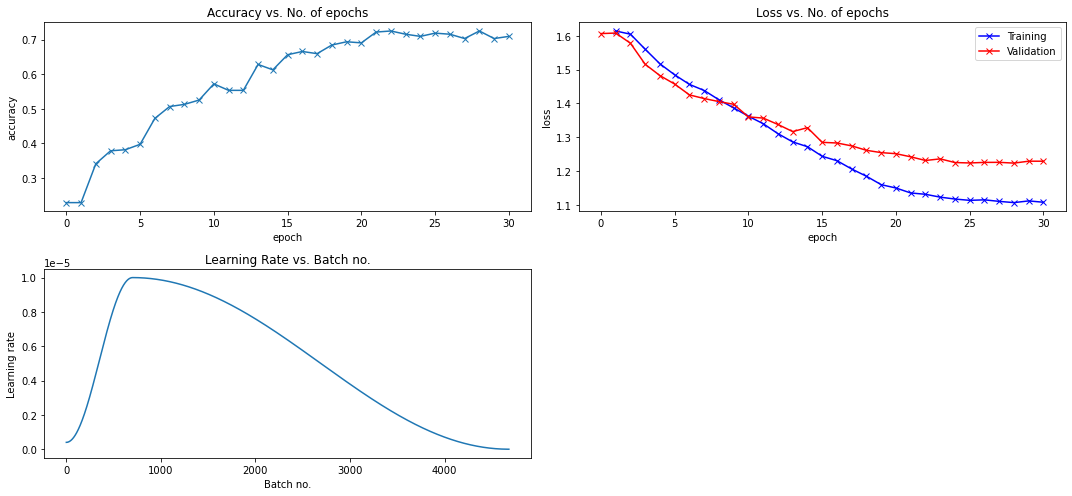

In [ ]:
fig = plt.figure(figsize=(15,7))

plt.subplot(2,2,1)
plot_accuracies(history)

plt.subplot(2,2,2)
plot_losses(history)

plt.subplot(2,2,3)
plot_lrs(history)

fig.tight_layout() 
plt.show()

In [ ]:
torch.save(spectro_model.state_dict(), 'EAC-spectro_model.pth')
# jovian.commit(project=project_name, outputs=['EAC-spectro_model.pth'],files=[test_csv,train_csv], environment=None)

### Training the model with Mel-Spectrogram

In [ ]:
M = 1 # mel-spectrogram

max_dim = get_maxDim(test_csv,mode=M)
mel_max_dim = get_maxDim(train_csv, *max_dim, mode=M)

test_dataset = ravdessEmoDataSet(test_csv, dim = mel_max_dim, mode=M)
train_dataset = ravdessEmoDataSet(train_csv, dim = mel_max_dim, mode=M)
print(f" length : \n\ttest:{len(test_dataset)},\n\ttrain:{len(train_dataset)}")

batch_size = 40

train_dl = DataLoader(train_dataset, batch_size, shuffle=True, num_workers=4, pin_memory=True)
test_dl = DataLoader(test_dataset, batch_size*2, num_workers=4, pin_memory=True)

class_len= len(test_dataset.classes)
print(f"class lenght : {class_len}")

model = EmotionalResnet18(1,class_len,pretrained=True)
# model.load_state_dict(torch.load("./EAC-melSpectro_model.pth"))

device = get_default_device()
print(f"device : {device}")

train_dl = DeviceDataLoader(train_dl, device)
test_dl = DeviceDataLoader(test_dl, device)
melSpectro_model = to_device(model,device)


history = [evaluate(melSpectro_model, test_dl)]
print(history)

min-width : 259,	min-height : 128
max-width : 1087,	max-height : 128
min-width : 245,	min-height : 128
max-width : 1087,	max-height : 128
 length : 
	test:320,
	train:1560
class lenght : 5
device : cuda
[{'val_loss': 1.6143258810043335, 'val_acc': 0.16875000298023224}]


In [ ]:
%%time
history += fit_one_cycle(epochs, max_lr, melSpectro_model, train_dl, test_dl, 
                             grad_clip=grad_clip, 
                             weight_decay=weight_decay, 
                             opt_func=opt_func)

Epoch [0],last_lr: 1.480145084674146e-06, train_loss: 1.6096, val_loss: 1.6088, val_acc: 0.2031
Epoch [1],last_lr: 4.319251535090549e-06, train_loss: 1.6019, val_loss: 1.5972, val_acc: 0.2812
Epoch [2],last_lr: 7.575010695885305e-06, train_loss: 1.5838, val_loss: 1.5705, val_acc: 0.2937
Epoch [3],last_lr: 9.70723154461508e-06, train_loss: 1.5542, val_loss: 1.5249, val_acc: 0.3562
Epoch [4],last_lr: 9.990516681618647e-06, train_loss: 1.5235, val_loss: 1.5001, val_acc: 0.3719
Epoch [5],last_lr: 9.914865838957516e-06, train_loss: 1.5033, val_loss: 1.4839, val_acc: 0.3938
Epoch [6],last_lr: 9.764710943295776e-06, train_loss: 1.4795, val_loss: 1.4610, val_acc: 0.4219
Epoch [7],last_lr: 9.542328189792182e-06, train_loss: 1.4611, val_loss: 1.4512, val_acc: 0.4531
Epoch [8],last_lr: 9.251088674305358e-06, train_loss: 1.4371, val_loss: 1.4315, val_acc: 0.4812
Epoch [9],last_lr: 8.895407291016862e-06, train_loss: 1.4128, val_loss: 1.4208, val_acc: 0.5125
Epoch [10],last_lr: 8.480675807135715e-06

In [ ]:
train_time1 = "21min 25s"

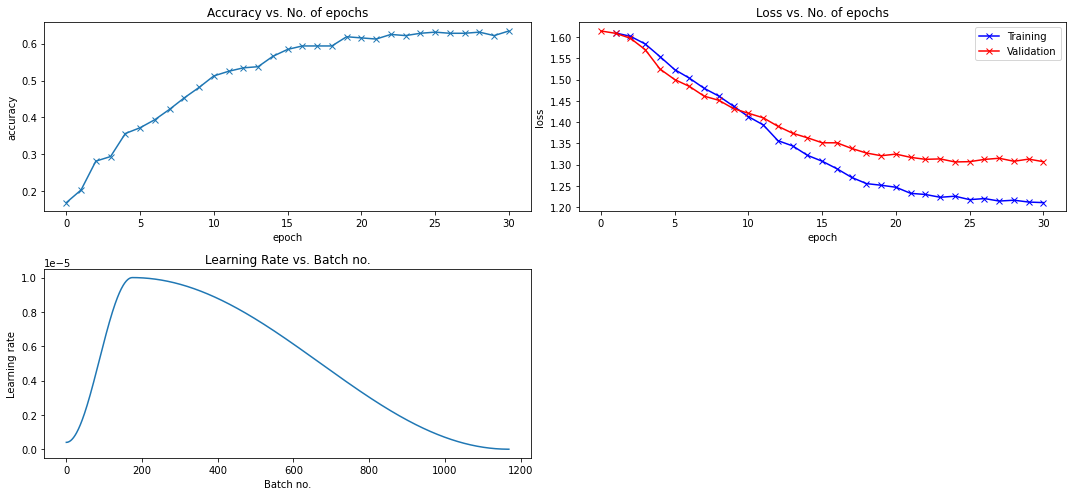

In [ ]:
fig = plt.figure(figsize=(15,7))

plt.subplot(2,2,1)
plot_accuracies(history)

plt.subplot(2,2,2)
plot_losses(history)

plt.subplot(2,2,3)
plot_lrs(history)

fig.tight_layout() 
plt.show()

In [ ]:
torch.save(melSpectro_model.state_dict(), 'EAC-melSpectro_model.pth')
# jovian.commit(project=project_name, outputs=['EAC-melSpectro_model.pth'],files=[test_csv,train_csv], environment=None)

### training the model on mfcc

In [ ]:
M = 2 # mfcc

max_dim = get_maxDim(test_csv,mode=M)
mfcc_max_dim = get_maxDim(train_csv, *max_dim, mode=M)

test_dataset = ravdessEmoDataSet(test_csv, dim = mfcc_max_dim, mode=M)
train_dataset = ravdessEmoDataSet(train_csv, dim = mfcc_max_dim, mode=M)
# train_dataset = ravdessEmoDataSet(train_csv, dim = max_dim, mode=0, loader=train_aug)
print(f" length : \n\ttest:{len(test_dataset)},\n\ttrain:{len(train_dataset)}")

batch_size = 80

train_dl = DataLoader(train_dataset, batch_size, shuffle=True, num_workers=4, pin_memory=True)
test_dl = DataLoader(test_dataset, batch_size*2, num_workers=4, pin_memory=True)

class_len= len(test_dataset.classes)
print(f"class lenght : {class_len}")

model = EmotionalResnet18(1,class_len,pretrained=False)
# model.load_state_dict(torch.load("./EAC-mfcc_model.pth"))

device = get_default_device()
print(f"device : {device}")

train_dl = DeviceDataLoader(train_dl, device)
test_dl = DeviceDataLoader(test_dl, device)
mfcc_model = to_device(model,device)


history = [evaluate(mfcc_model, test_dl)]
history

min-width : 130,	min-height : 20
max-width : 544,	max-height : 20
min-width : 123,	min-height : 20
max-width : 544,	max-height : 20
 length : 
	test:320,
	train:1560
class lenght : 5
device : cuda


[{'val_loss': 1.6590542793273926, 'val_acc': 0.22499999403953552}]

In [ ]:
%%time
epochs=50
history += fit_one_cycle(epochs, max_lr, mfcc_model, train_dl, test_dl, 
                             grad_clip=grad_clip, 
                             weight_decay=weight_decay, 
                             opt_func=opt_func)

Epoch [0],last_lr: 7.800403586951771e-07, train_loss: 1.6166, val_loss: 1.6124, val_acc: 0.2000
Epoch [1],last_lr: 1.933404865278923e-06, train_loss: 1.6158, val_loss: 1.6076, val_acc: 0.1844
Epoch [2],last_lr: 3.659087271532977e-06, train_loss: 1.6087, val_loss: 1.6001, val_acc: 0.2469
Epoch [3],last_lr: 5.654742508811528e-06, train_loss: 1.5954, val_loss: 1.5879, val_acc: 0.2875
Epoch [4],last_lr: 7.570725406298866e-06, train_loss: 1.5777, val_loss: 1.5677, val_acc: 0.3313
Epoch [5],last_lr: 9.07134964154909e-06, train_loss: 1.5542, val_loss: 1.5401, val_acc: 0.3656
Epoch [6],last_lr: 9.893701056213005e-06, train_loss: 1.5245, val_loss: 1.5136, val_acc: 0.3781
Epoch [7],last_lr: 9.996585314373913e-06, train_loss: 1.5003, val_loss: 1.4924, val_acc: 0.3906
Epoch [8],last_lr: 9.969295807293632e-06, train_loss: 1.4802, val_loss: 1.4777, val_acc: 0.4125
Epoch [9],last_lr: 9.914865838957516e-06, train_loss: 1.4653, val_loss: 1.4639, val_acc: 0.4281
Epoch [10],last_lr: 9.833592686977852e-06

In [ ]:
train_time2 = "24min 32s"

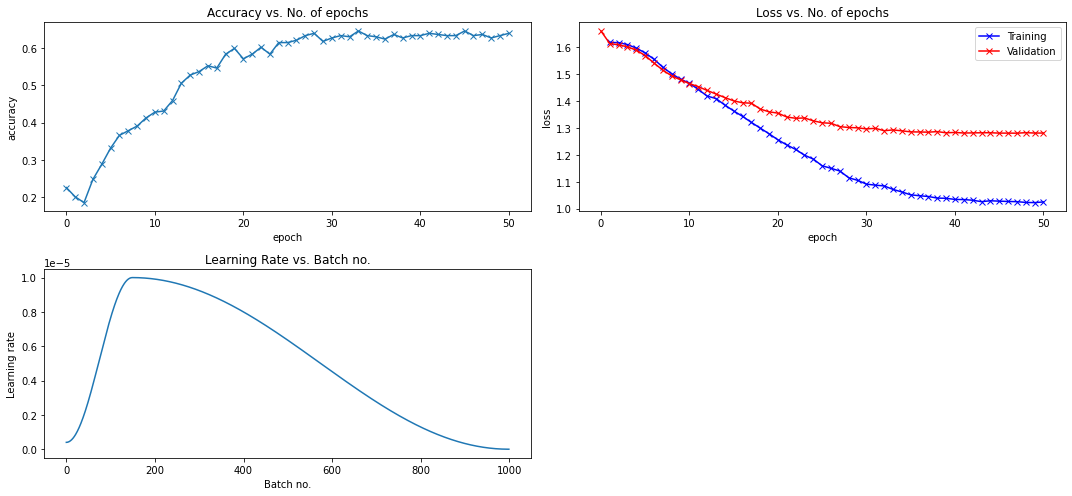

In [ ]:
fig = plt.figure(figsize=(15,7))

plt.subplot(2,2,1)
plot_accuracies(history)

plt.subplot(2,2,2)
plot_losses(history)

plt.subplot(2,2,3)
plot_lrs(history)

fig.tight_layout() 
plt.show()

In [ ]:
torch.save(mfcc_model.state_dict(), 'EAC-mfcc_model.pth')
# jovian.commit(project=project_name, outputs=['EAC-mfcc_model.pth'],files=[test_csv,train_csv], environment=None)

## Summary : Choosing the MODE

it was not clear which model should I choose to for prediction.

**Spectrogram-dataset**

- In accuracy spectrogarm-model was ahead of the others by more than 3-5% in case of using pretrained model
- But it required the most RAM, TIME, computation to achieve it, 
- yet some degree of over fitting was noticeable after 20-25 epochs.

HISTORY(last three): 

1. epochs: 50,accuracy : 0.7563, time : 1h 45min 55s, pretrained: True
2. epochs : 50, accuracy: 0.2281 time : 1h 50min 39s,  pretrained: False
3. epochs: 30, accuracy : 0.7094, time : 1h 3min 39s,  pretrained: True

**Mel_Spectrogram-dataset**

- In accuracy it was neck and neck with `mfcc-dataset` ahead by only 1%,
- Though it had taken more time than `mfcc-dataset` but a lot less than `spetrogram-dataset`
- On the UP side working with this dataset showed the least overfitting among the three 

HISTORY(last three):
1. ecochs : 50, accuracy : 0.6687, time : 37min 10s, pretrained : True
2. ecochs : 50, accuracy : 0.3844, time : 35min 1s, pretrained : False
3. epochs : 30, accuracy : 0.6344, time : 21min 25s, pretrained : True

**MFCC-dataset**

- In time-consumption it is the lowest with a cost of bit accuracy
- most of all it didn't need use the pretrained wights to get to over 65% accuracy
- It has also shown the most ammount of overfitting after 25 epoch

HISTORY(last three):
1. epochs: 50, accuracy : 0.6594, time : 22min 43s, pretrained : True
2. epochs: 50, accuracy : 0.6719, time : 22min 56s, pretrained : False
3. epochs: 30, acccurcy : 0.5688, time : 13min 14s, pretrained : False

My expectation was the dataset with the mel-spectrogram will be the best in all categories.

But seeing all these first I thought `mfcc` is the best choice and it is the best I think, then ***chosen Spectrogram-data*** as it promised more accuracy than all the others and the the trade off for time seemed resomable. 

## Testing Individual Audio

Tring to predict with the `mode` set to "0" for audio as Spectrogram with the model trained for 30 epochs with pretrained set to `True`

In [ ]:
device

device(type='cuda')

In [ ]:
spectro_max_dim

(1025, 1087)

In [ ]:
test_dataset = ravdessEmoDataSet(test_csv, dim = spectro_max_dim, mode=0)
test_dl = DataLoader(test_dataset, 20, num_workers=4, pin_memory=True)

class_len= len(test_dataset.classes)
model = EmotionalResnet18(1,class_len,pretrained=False)
model.load_state_dict(torch.load("./EAC-spectro_model.pth"))

test_dl = DeviceDataLoader(test_dl, device)
model = to_device(model,device)

evaluate(model, test_dl)

/opt/conda/lib/python3.7/site-packages/librosa/core/spectrum.py:608: RuntimeWarning: invalid value encountered in true_divide
  correction = -np.imag(S_dh / S_h)
/opt/conda/lib/python3.7/site-packages/librosa/core/spectrum.py:780: RuntimeWarning: invalid value encountered in true_divide
  correction = np.real(S_th / S_h)
/opt/conda/lib/python3.7/site-packages/librosa/core/spectrum.py:608: RuntimeWarning: invalid value encountered in true_divide
  correction = -np.imag(S_dh / S_h)
/opt/conda/lib/python3.7/site-packages/librosa/core/spectrum.py:780: RuntimeWarning: invalid value encountered in true_divide
  correction = np.real(S_th / S_h)
/opt/conda/lib/python3.7/site-packages/librosa/core/spectrum.py:608: RuntimeWarning: invalid value encountered in true_divide
  correction = -np.imag(S_dh / S_h)
/opt/conda/lib/python3.7/site-packages/librosa/core/spectrum.py:780: RuntimeWarning: invalid value encountered in true_divide
  correction = np.real(S_th / S_h)
/opt/conda/lib/python3.7/site-p

{'val_loss': 1.2288745641708374, 'val_acc': 0.7093749642372131}

In [ ]:
def predict_emotion(audio_path, model, max_height=0, max_width=0, mode=0):
    s, waveform, rate = load_spec(audio_path, mode = mode)

    _, height, width = list(s.shape)
    
    diff = [(max_height - height), (max_width - width)]
    # pad on both side of the tensor by zeros
    pd1 = (diff[1]//2, diff[1]-diff[1]//2, diff[0]//2,diff[0]-diff[0]//2)
    s = F.pad(s, pd1, mode='constant', value=0)
    
    # Convert to a batch of 1
    xb = to_device(s.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    print(f"predicted : {train_dataset.classes[preds[0].item()]}")
    return waveform
    # return preds[0].item()

In [ ]:
indx = 15
audio_path = os.path.join(test_dataframe.iloc[indx]["Audio_file"])

print(f"Audio Location : {audio_path}")
print(f"Label : {test_dataframe.iloc[indx]['emotion']}")

wave = predict_emotion(audio_path,model, *spectro_max_dim)

ipd.Audio(data=wave,rate=48000)

Audio Location : ../input/ravdess-emotional-speech-audio/Actor_07/03-01-06-02-01-02-07.wav
Label : fearful
predicted : fearful


In [ ]:
indx = 150
audio_path = os.path.join(test_dataframe.iloc[indx]["Audio_file"])

print(f"Audio Location : {audio_path}")
print(f"Label : {test_dataframe.iloc[indx]['emotion']}")

wave = predict_emotion(audio_path,model, *spectro_max_dim)

ipd.Audio(data=wave,rate=48000)

Audio Location : ../input/ravdess-emotional-speech-audio/Actor_18/03-01-02-01-02-02-18.wav
Label : calm
predicted : calm


In [ ]:
indx = 199
audio_path = os.path.join(test_dataframe.iloc[indx]["Audio_file"])

print(f"Audio Location : {audio_path}")
print(f"Label : {test_dataframe.iloc[indx]['emotion']}")

wave = predict_emotion(audio_path,model, *spectro_max_dim)

ipd.Audio(data=wave,rate=48000)

Audio Location : ../input/ravdess-emotional-speech-audio/Actor_06/03-01-05-02-01-02-06.wav
Label : angry
predicted : angry


In [ ]:
indx = 315
audio_path = os.path.join(test_dataframe.iloc[indx]["Audio_file"])

print(f"Audio Location : {audio_path}")
print(f"Label : {test_dataframe.iloc[indx]['emotion']}")

wave = predict_emotion(audio_path,model, *spectro_max_dim)

ipd.Audio(data=wave,rate=48000)

Audio Location : ../input/ravdess-emotional-song-audio/Actor_22/03-02-06-02-02-01-22.wav
Label : fearful
predicted : happy


## Final Thoughts

Clearly the model and the methods used for data processing is not perfect. 

However I tried the image data augmentation on the Spectrograms(2d representations of audio) but it didn't went well. so I ended up with just a padding to match the size.

It has room for improvement, one thing I can think of is applying data augmentation on the audio. 


## Save and Commit

Here I'm uploading the notebook with the outputs and csv files in jovian.

I commneted out this section for the `Save and Run All(Commit)` in kaggle as the `jovian.commit` prompts for a api key which I can't pass during that time so it throws long errormessages which don't like. 

In [9]:
!pip install jovian --upgrade --quiet

     |████████████████████████████████| 71kB 4.2MB/s 


In [10]:
import jovian

In [11]:
jovian.reset()
jovian.log_hyperparams(arch='hyperparameters correction done', 
                       epochs=epochs, 
                       lr=max_lr, 
                       scheduler='one-cycle', 
                       weight_decay=weight_decay, 
                       grad_clip=grad_clip,
                       opt=opt_func.__name__)

[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Hyperparams logged.


In [13]:
# Epoch [29],last_lr: 4.0000000000000004e-11, train_loss: 1.1075, val_loss: 1.2289, val_acc: 0.7094
# Epoch [49],last_lr: 4.0000000000000004e-11, train_loss: 0.9514, val_loss: 1.1731, val_acc: 0.7563
# jovian.log_metrics(val_loss=history[-1]['val_loss'],val_acc=history[-1]['val_acc'],train_loss=history[-1]['train_loss'],time=train_time)
jovian.log_metrics(val_loss=1.2289,val_acc=0.7094,train_loss=1.1075,time="1h 3min 39s")

# jovian.log_metrics(val_loss = 1.1731, 
                  #  val_acc = 0.7563,
                  #  train_loss = 0.9514,
                  #  time="1h 45min 55s")

[jovian] Metrics logged.


In [ ]:
jovian.commit(project=project_name, outputs=['EAC-spectro_model-30eph_74%.pth', 'EAC-mfcc_model_50eph_67%.pth', 'EAC-spectro_model.pth', 'EAC-melSpectro_model.pth', 'EAC-mfcc_model.pth'],files=["test.csv", "train.csv"], environment=None)